# The Wild Rides of Oil-Rich States
<b>Makeover Monday 2019 Week 15 - State Fiscal Rankings by Susan Glass</b>
<p><p><i>Many thanks to Eva Murray and Andy Kriebel, for their incredible work and dedication in running the Makeover Monday community project.</i>

## Table of Contents
<ul>
<li><a href="#ref">References and Acknowledgements</a></li>
<li><a href="#clean">Data Assessment and Cleaning</a></li>
<li><a href="#explore">Exploratory Analyses</a></li>
</ul>

<a id='ref'></a>
## References and Acknowledgements
<p>Makeover Monday Week 15: http://www.makeovermonday.co.uk/data/
<p>Mercatus Report on State Fiscal Solvency 2018: https://www.mercatus.org/statefiscalrankings
<p>Data on data.world: https://data.world/makeovermonday/2019w15
<p>nbviewer link for this notebook: 

<a id='clean'></a>
## Data Assessment and Cleaning

In [165]:
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib styles: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
# This line affects the style on the plotly express and pandas graphs as well - 
# probably will affect all libraries based on matplotlib
plt.style.use('default')

In [166]:
# Import data
df = pd.read_csv('data.csv')
df.head()
#df.query('state=="Alaska"')[["year","1_cash_ratio", "2_quick_ratio", "3_current_ratio"]]

,state,year,c_ce_i,c_ce_i_r,total_current_assets,current_liabilities,noncurrent_liabilities,unrestricted_net_assets,restricted_net_assets,total_net_assets,...,10_rev_income_ratio,11_exp_income_ratio,12_pension_income_ratio,13_opeb_income_ratio,cashrank,lrrank,budgetrank,servicelvlrank,trustrank,overallrank
0,Alabama,2006,8.833844e+06,9.839963e+06,1.096480e+07,1.916890e+06,1.892574e+06,7.884798e+05,7.662677e+06,2.840415e+07,...,0.123877,0.113231,0.161096,0.107870,2.0,5.0,15.0,15.0,37.0,3.0
1,Alaska,2006,4.825684e+07,4.966675e+07,6.032053e+07,1.301590e+07,2.009314e+06,9.380565e+06,3.726167e+07,5.290015e+07,...,0.402357,0.239536,0.373484,0.442582,4.0,2.0,1.0,50.0,50.0,1.0
2,Arizona,2006,5.963508e+06,7.059144e+06,7.771343e+06,3.211195e+06,7.415246e+06,1.173256e+06,5.906337e+06,2.377308e+07,...,0.127062,0.112165,0.114894,0.003396,20.0,19.0,7.0,24.0,19.0,22.0
3,Arkansas,2006,4.186876e+06,5.558567e+06,5.779994e+06,1.517469e+06,4.475565e+06,3.022929e+06,1.847532e+06,1.575589e+07,...,0.167211,0.163541,0.158794,0.000000,5.0,23.0,34.0,42.0,28.0,24.0
4,California,2006,4.234090e+07,5.509511e+07,7.052001e+07,4.346185e+07,1.136610e+08,-6.298755e+07,2.042160e+07,5.780017e+07,...,0.121692,0.119673,0.095285,0.026751,43.0,46.0,42.0,25.0,15.0,41.0


In [167]:
df.describe()

,year,c_ce_i,c_ce_i_r,total_current_assets,current_liabilities,noncurrent_liabilities,unrestricted_net_assets,restricted_net_assets,total_net_assets,total_assets,...,10_rev_income_ratio,11_exp_income_ratio,12_pension_income_ratio,13_opeb_income_ratio,cashrank,lrrank,budgetrank,servicelvlrank,trustrank,overallrank
count,561.0000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2011.0000,9.381333e+06,1.339332e+07,1.512639e+07,6.919787e+06,1.895588e+07,-7.473240e+06,6.628605e+06,1.694822e+07,4.277627e+07,...,0.139942,0.134435,0.290886,0.042006,25.500000,25.500000,25.500000,25.500000,25.500000,25.500000
std,3.1651,1.188887e+07,1.455847e+07,1.642368e+07,9.101404e+06,3.051502e+07,2.391422e+07,1.109536e+07,2.954940e+07,4.695373e+07,...,0.048480,0.035500,0.145202,0.056107,14.301442,14.301442,14.301442,14.301442,14.301442,14.301442
min,2006.0000,4.121558e+05,7.887367e+05,7.985232e+05,4.169978e+05,1.952748e+05,-1.772326e+08,5.492163e+04,-1.267270e+08,2.863946e+06,...,0.069441,0.061643,0.030737,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2008.0000,3.687632e+06,5.477075e+06,6.056098e+06,2.097041e+06,2.952705e+06,-6.954611e+06,2.027182e+06,6.659058e+06,1.856358e+07,...,0.112855,0.110743,0.187723,0.003685,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
50%,2011.0000,5.094993e+06,8.253186e+06,9.116800e+06,4.099126e+06,7.544220e+06,-7.721320e+05,3.609745e+06,1.557092e+07,3.113881e+07,...,0.131186,0.128865,0.267931,0.026968,25.500000,25.500000,25.500000,25.500000,25.500000,25.500000
75%,2014.0000,9.200113e+06,1.381562e+07,1.551840e+07,7.039576e+06,1.758891e+07,1.358101e+06,6.144659e+06,2.228436e+07,4.220367e+07,...,0.153712,0.150106,0.362089,0.057211,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
max,2016.0000,7.756930e+07,7.877781e+07,8.417142e+07,5.503319e+07,2.214442e+08,2.876947e+07,8.968250e+07,1.780756e+08,2.899770e+08,...,0.533143,0.298662,0.981724,0.442582,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [168]:
# plotly map needs state abbreviation, not state name
# Dictionary taken from here: https://gist.github.com/Quenty/74156dcc4e21d341ce52da14a701c40c
statename_to_abbr = {
    # Other
    'District of Columbia': 'DC',
    
    # States
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}

In [169]:
# Add state abbreviations so plotly can recognize geographical locations
df['state_abbrev'] = df['state'].map(statename_to_abbr)
df.head()

,state,year,c_ce_i,c_ce_i_r,total_current_assets,current_liabilities,noncurrent_liabilities,unrestricted_net_assets,restricted_net_assets,total_net_assets,...,11_exp_income_ratio,12_pension_income_ratio,13_opeb_income_ratio,cashrank,lrrank,budgetrank,servicelvlrank,trustrank,overallrank,state_abbrev
0,Alabama,2006,8.833844e+06,9.839963e+06,1.096480e+07,1.916890e+06,1.892574e+06,7.884798e+05,7.662677e+06,2.840415e+07,...,0.113231,0.161096,0.107870,2.0,5.0,15.0,15.0,37.0,3.0,AL
1,Alaska,2006,4.825684e+07,4.966675e+07,6.032053e+07,1.301590e+07,2.009314e+06,9.380565e+06,3.726167e+07,5.290015e+07,...,0.239536,0.373484,0.442582,4.0,2.0,1.0,50.0,50.0,1.0,AK
2,Arizona,2006,5.963508e+06,7.059144e+06,7.771343e+06,3.211195e+06,7.415246e+06,1.173256e+06,5.906337e+06,2.377308e+07,...,0.112165,0.114894,0.003396,20.0,19.0,7.0,24.0,19.0,22.0,AZ
3,Arkansas,2006,4.186876e+06,5.558567e+06,5.779994e+06,1.517469e+06,4.475565e+06,3.022929e+06,1.847532e+06,1.575589e+07,...,0.163541,0.158794,0.000000,5.0,23.0,34.0,42.0,28.0,24.0,AR
4,California,2006,4.234090e+07,5.509511e+07,7.052001e+07,4.346185e+07,1.136610e+08,-6.298755e+07,2.042160e+07,5.780017e+07,...,0.119673,0.095285,0.026751,43.0,46.0,42.0,25.0,15.0,41.0,CA


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 42 columns):
state                      561 non-null object
year                       561 non-null int64
c_ce_i                     561 non-null float64
c_ce_i_r                   561 non-null float64
total_current_assets       561 non-null float64
current_liabilities        561 non-null float64
noncurrent_liabilities     561 non-null float64
unrestricted_net_assets    561 non-null float64
restricted_net_assets      561 non-null float64
total_net_assets           561 non-null float64
total_assets               561 non-null float64
total_liabilities          561 non-null float64
total_taxes                561 non-null float64
total_revenue              561 non-null float64
total_expenses             561 non-null float64
noncurrent_liability       561 non-null float64
change_in_net_assets       561 non-null float64
population                 561 non-null float64
uaal_pension_risk_free     561 non

In [171]:
# Looks like 1 or 2 states didn't find abbreviations
df_missing = df.query('state_abbrev != state_abbrev')
df_missing.state.value_counts()

Average     11
Florida     11
Name: state, dtype: int64

In [172]:
# Why isn't Florida finding its abbreviation?
df_missing_states = "*" + df_missing.state.map(str) + "*"
df_missing_states.value_counts()

*Average*     11
*Florida *    11
Name: state, dtype: int64

In [173]:
# Correct the extra space for Florida and redo abbreviation mapping
df.loc[df['state'] == 'Florida ', 'state'] = 'Florida'
df['state_abbrev'] = df['state'].map(statename_to_abbr)
df_missing = df.query('state_abbrev != state_abbrev')
print(df_missing.state.value_counts())
# Still have the "Average" rows

Average    11
Name: state, dtype: int64


In [174]:
# Remove "Average"
df_with_avg = df
df = df.query('state != "Average"')
df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [175]:
oil_states = ['Alaska','North Dakota','Wyoming']
# Focus analysis on oil states
df['is_oil_state'] = df.apply(lambda x: 
                                  'oil' if x['state'] in oil_states
                                  else 'avg' if x['state'] == "Average"
                                  else 'reg', 
                                  axis=1)
# Also focus on low-population states so graphs are clearer
# Choose states with population that was ever below 3M -
# want to take all years for each state
low_pop_states = df.query('population<2000000').state.unique()

df.head()

/Users/susanglass/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,state,year,c_ce_i,c_ce_i_r,total_current_assets,current_liabilities,noncurrent_liabilities,unrestricted_net_assets,restricted_net_assets,total_net_assets,...,12_pension_income_ratio,13_opeb_income_ratio,cashrank,lrrank,budgetrank,servicelvlrank,trustrank,overallrank,state_abbrev,is_oil_state
0,Alabama,2006,8.833844e+06,9.839963e+06,1.096480e+07,1.916890e+06,1.892574e+06,7.884798e+05,7.662677e+06,2.840415e+07,...,0.161096,0.107870,2.0,5.0,15.0,15.0,37.0,3.0,AL,reg
1,Alaska,2006,4.825684e+07,4.966675e+07,6.032053e+07,1.301590e+07,2.009314e+06,9.380565e+06,3.726167e+07,5.290015e+07,...,0.373484,0.442582,4.0,2.0,1.0,50.0,50.0,1.0,AK,oil
2,Arizona,2006,5.963508e+06,7.059144e+06,7.771343e+06,3.211195e+06,7.415246e+06,1.173256e+06,5.906337e+06,2.377308e+07,...,0.114894,0.003396,20.0,19.0,7.0,24.0,19.0,22.0,AZ,reg
3,Arkansas,2006,4.186876e+06,5.558567e+06,5.779994e+06,1.517469e+06,4.475565e+06,3.022929e+06,1.847532e+06,1.575589e+07,...,0.158794,0.000000,5.0,23.0,34.0,42.0,28.0,24.0,AR,reg
4,California,2006,4.234090e+07,5.509511e+07,7.052001e+07,4.346185e+07,1.136610e+08,-6.298755e+07,2.042160e+07,5.780017e+07,...,0.095285,0.026751,43.0,46.0,42.0,25.0,15.0,41.0,CA,reg


<a id='explore'></a>
## Exploratory Analysis

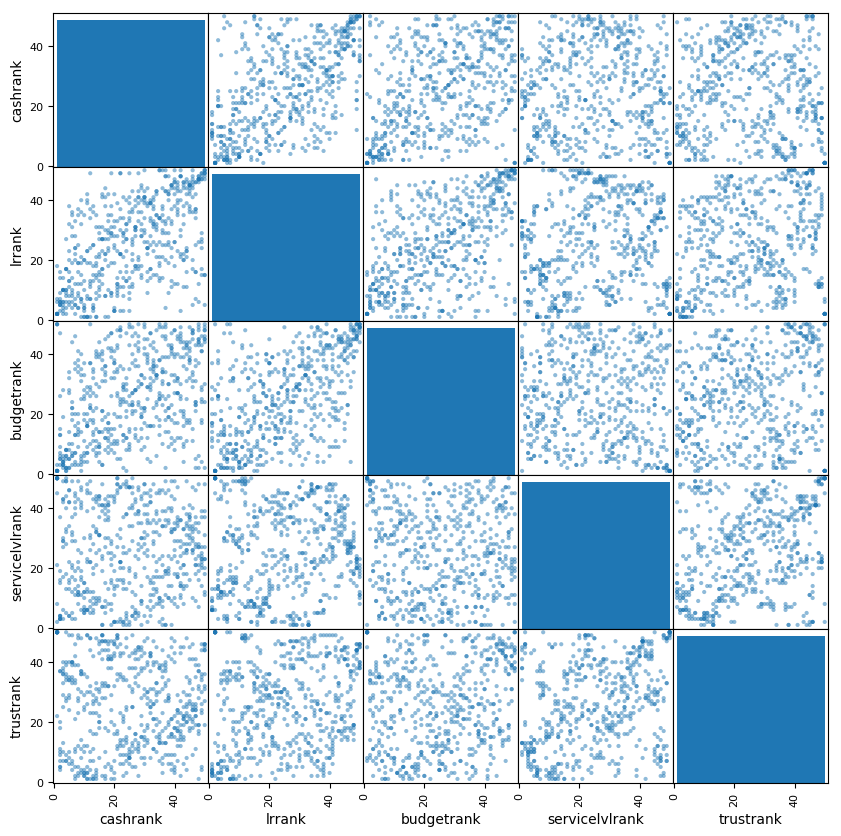

In [128]:
# Look for correlations between the 5 ranks, all years and all states
df_ranks = df[['state','cashrank','lrrank','budgetrank','servicelvlrank','trustrank']]

# Final semicolon suppresses unwanted printout before graph
pd.plotting.scatter_matrix(df_ranks, figsize=(10,10));
# lrrank <> cashrank, lrrank <> budgetrank, budgetrank <> cashrank have some correlation

# NOTE: Final semicolon suppresses the graph in plotly express!
# Also, the dots are too big
#px.scatter_matrix(df_ranks)

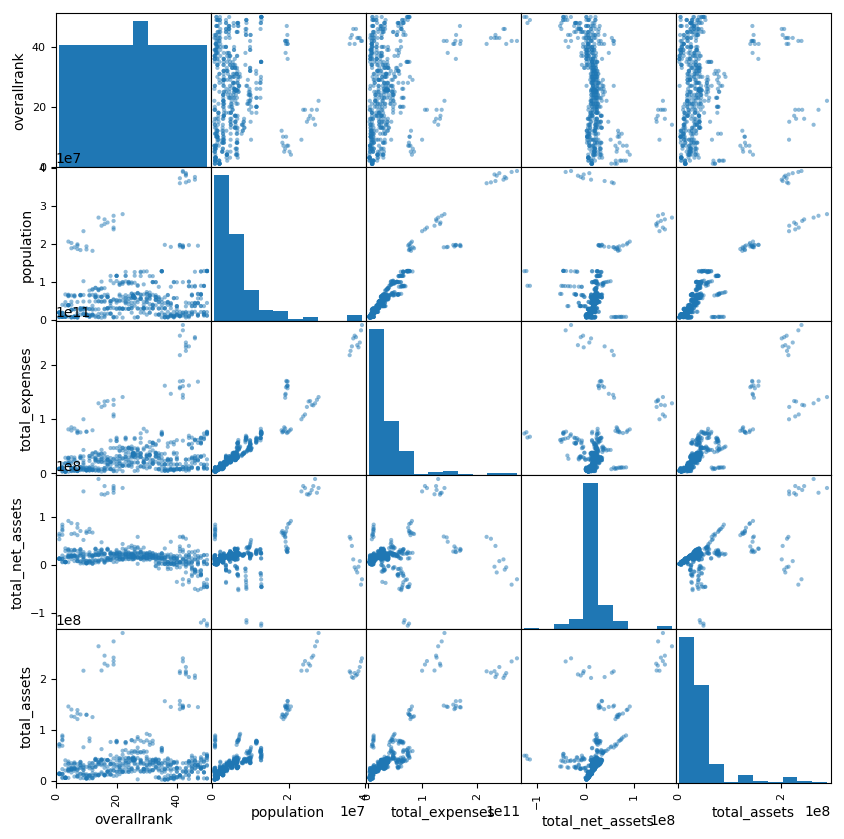

In [64]:
# Look for correlations between the 5 metrics, all years and all states
df_totals = df[['state','overallrank','population','total_expenses',
               'total_net_assets','total_assets']]

pd.plotting.scatter_matrix(df_totals, figsize=(10,10));
# lrrank <> cashrank, lrrank <> budgetrank, budgetrank <> cashrank have some correlation

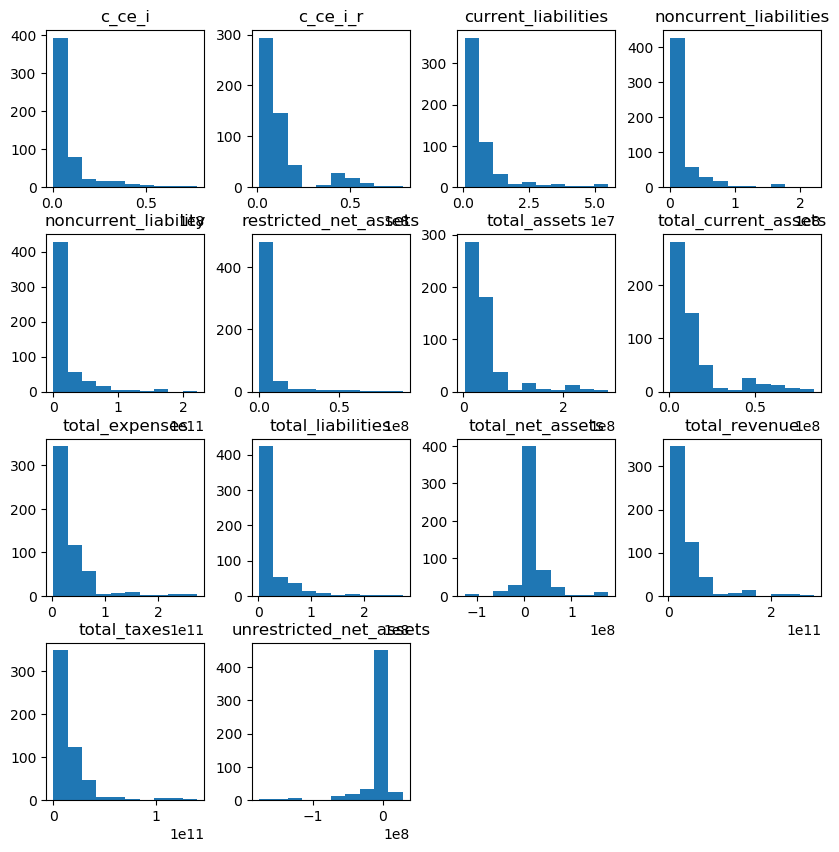

In [126]:
# View all histograms at once for basic metrics - pandas function
df_metrics = df[['state', 'c_ce_i', 'c_ce_i_r', 'total_current_assets', 'current_liabilities', 
                 'noncurrent_liabilities', 'unrestricted_net_assets', 
                 'restricted_net_assets', 'total_net_assets', 'total_assets', 
                 'total_liabilities', 'total_taxes', 'total_revenue', 'total_expenses', 
                 'noncurrent_liability']]
hist = df_metrics.hist(bins=10, figsize=(10,10),grid=False) # I hate the grid lines!

<a id='analysis'></a>
## Analysis

In [55]:
px.density_contour(df, 
                   x="total_taxes", 
                   y="total_expenses", 
                   color="state"
                  )

In [54]:
px.density_contour(df, 
                   x="total_revenue", 
                   y="total_expenses", 
                   animation_frame='year',
                  animation_group='state'
                  )

In [86]:
df['surplus_percap_sign'] = df.apply(lambda x: 
                                      'neg' if x['5_surplus_percap'] < 0
                                      else 'zero' if x['5_surplus_percap'] == 0
                                      else 'pos', 
                                      axis=1)
px.scatter(df, 
           x="total_revenue", 
           y="total_expenses",
           size="population", 
           size_max=50, 
           color="surplus_percap_sign",
           color_discrete_map = {"neg": "lightsalmon", "zero": "white", "pos":"lightgreen"}, 
           hover_name="state", 
           animation_frame="year", 
           animation_group="state", 
           #log_x=True, 
           range_x=[0,1.2 * df.total_revenue.max()], # California kept floating off the chart!
           range_y=[0,1.2 * df.total_expenses.max()],
           labels=dict(total_taxes="Total Revenue", 
                       total_expenses="Total Expenses", 
                       overallrank="Overall Rank")
          )

In [142]:
df_low_pop = df[df['state'].isin(low_pop_states)]
px.scatter(df_low_pop, 
           x="population", 
           y="total_taxes",
           #size="population", 
           #size_max=50, 
           color="state",
           hover_name="state", 
           marginal_y="violin",
           marginal_x="violin",
           labels=dict(total_taxes="Total Taxes", 
                       total_revenue="Total Revenue", 
                       total_expenses="Total Expenses", 
                       overallrank="Overall Rank")
          )

In [149]:
orders_dict = {'state': df_low_pop.state.unique()}
px.violin(df_low_pop.sort_values(by='population'), 
          y="5_surplus_percap", 
          x="state", 
          color="is_oil_state", 
          category_orders=orders_dict,
          color_discrete_map = {"oil": "mediumpurple", "avg": "white", "reg":"silver"}, 
          points="all"
         )

In [163]:
px.scatter(df_low_pop, 
           x="total_revenue", 
           y="total_expenses",
           size="population", 
           size_max=25, 
           color="is_oil_state",
          color_discrete_map = {"oil": "mediumpurple", "avg": "white", "reg":"silver"}, 
           hover_name="state", 
           animation_frame="year", 
           animation_group="state", 
           #log_x=True, 
           #range_x=[0,1.2 * df.total_revenue.max()], # California kept floating off the chart!
           #range_y=[0,1.2 * df.total_expenses.max()],
           labels=dict(total_revenue="Total Revenue", 
                       total_expenses="Total Expenses", 
                       overallrank="Overall Rank")
          )

In [159]:
px.line(df_low_pop, 
        x="year", 
        y="5_surplus_percap", 
        color="is_oil_state", 
        line_group="state", 
        hover_name="state", 
          color_discrete_map = {"oil": "mediumpurple", "avg": "white", "reg":"silver"}, 
       # template="plotly_dark"
           #animation_frame="year", 
           #animation_group="state", 
        #range_y=[52,0],
        #line_shape="spline"
       )

In [100]:
# I need to use a log scale because of Alaska?!!!

# Must force bars to stay in same order through each year
category_orders_dict = {'state': df.state.unique()}
px.bar(df.sort_values(by='state'), 
           y="5_surplus_percap",
           x="state",
           category_orders=category_orders_dict,
           orientation='v',
           color="surplus_percap_sign",
           color_discrete_map = {"neg": "lightsalmon", "zero": "white", "pos":"lightgreen"}, 
           hover_name="state", 
           animation_frame="year", 
           animation_group="state", 
           #log_x=True, 
           range_y=[-4000,4000], 
           width=1000
           #labels=dict(5_surplus_percap="Surplus Per Capita", 
            #           overallrank="Overall Rank")
          )

In [102]:
px.scatter(df, 
           x="4_op_ratio", 
           y="5_surplus_percap",
           size="budgetrank", 
           size_max=25, 
           color="budgetrank", 
           hover_name="state", 
           animation_frame="year", 
           animation_group="state", 
           #log_x=True, 
           #labels=dict("4_op_ratio"="Operating Ratio", 
            #           "5_surplus_percap"="Surplus or Deficit Per Capita", 
            #           "budgetrank"="Budget Rank")
          )

In [164]:
px.line(df, 
        x="year", 
        y="noncurrent_liabilities", 
        color="state", 
        line_group="state", 
        hover_name="state", 
        line_shape="spline")
# 2014 Change in reporting of state pension obligations

In [18]:
px.violin(df, y="7_long_term_liab", x="year")

In [35]:
px.choropleth(df, 
              locations="state_abbrev", 
              color="overallrank", 
              hover_name="state", 
              animation_frame="year",
              locationmode="USA-states",
              scope='usa',
             color_continuous_scale=px.colors.diverging.Spectral)